In [45]:
import pandas as pd
import numpy as np
from datetime import datetime

df1= pd.read_excel('PSP_Jan_Feb_2019.xlsx')
drop_list=[]

for i in range(len(df1)-1):
    if df1.loc[i,'country']==df1.loc[i+1,'country'] and df1.loc[i,'amount']==df1.loc[i+1,'amount']:
        dt1 = df1.loc[i,'tmsp']
        dt2 = df1.loc[i+1,'tmsp']
        delta=dt2-dt1
        if delta.seconds<=60:
            drop_list.append(i)  

In [46]:
raw_dataset = df1.drop(df1.index[drop_list])
raw_dataset=raw_dataset.reset_index()
raw_dataset.shape[0]

27337

In [47]:

raw_dataset = raw_dataset.drop('Unnamed: 0', axis=1)
raw_dataset.head(10)

,index,tmsp,country,amount,success,PSP,3D_secured,card
0,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
1,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
2,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners
3,6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master
4,7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master
5,9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa
6,14,2019-01-01 00:14:35,Austria,232,1,UK_Card,1,Diners
7,15,2019-01-01 00:15:45,Germany,268,0,Simplecard,0,Master
8,18,2019-01-01 00:18:37,Switzerland,89,0,Moneycard,0,Master
9,21,2019-01-01 00:21:11,Germany,205,1,Moneycard,0,Master


In [48]:
prepros_dataset=pd.DataFrame()
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,2]=='Germany':
        prepros_dataset.loc[i,'Is_Germany']=1
        prepros_dataset.loc[i,'Is_Austria']=0
        prepros_dataset.loc[i,'Is_Switzerland']=0
    elif raw_dataset.iloc[i,2]=='Austria':
        prepros_dataset.loc[i,'Is_Germany']=0
        prepros_dataset.loc[i,'Is_Austria']=1
        prepros_dataset.loc[i,'Is_Switzerland']=0
    elif raw_dataset.iloc[i,2]=='Switzerland':
        prepros_dataset.loc[i,'Is_Germany']=0
        prepros_dataset.loc[i,'Is_Austria']=0
        prepros_dataset.loc[i,'Is_Switzerland']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [49]:
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,7]=='Visa':
        prepros_dataset.loc[i,'Is_Visa']=1
        prepros_dataset.loc[i,'Is_Diners']=0
        prepros_dataset.loc[i,'Is_Master']=0
    elif raw_dataset.iloc[i,7]=='Diners':
        prepros_dataset.loc[i,'Is_Visa']=0
        prepros_dataset.loc[i,'Is_Diners']=1
        prepros_dataset.loc[i,'Is_Master']=0
    elif raw_dataset.iloc[i,7]=='Master':
        prepros_dataset.loc[i,'Is_Visa']=0
        prepros_dataset.loc[i,'Is_Diners']=0
        prepros_dataset.loc[i,'Is_Master']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master
0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0


In [31]:
raw_dataset['amount'].describe(percentiles=[.05,.95])

count    27337.000000
mean       201.878370
std         96.144551
min          6.000000
5%          43.000000
50%        200.000000
95%        366.000000
max        630.000000
Name: amount, dtype: float64

In [50]:
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,3]<100:
        prepros_dataset.loc[i,'amount0']=1
        prepros_dataset.loc[i,'amount1']=0
        prepros_dataset.loc[i,'amount2']=0
    elif 100<= raw_dataset.iloc[i,3] <=300:
        prepros_dataset.loc[i,'amount0']=0
        prepros_dataset.loc[i,'amount1']=1
        prepros_dataset.loc[i,'amount2']=0
    elif raw_dataset.iloc[i,3] >300:
        prepros_dataset.loc[i,'amount0']=0
        prepros_dataset.loc[i,'amount1']=0
        prepros_dataset.loc[i,'amount2']=1
        
prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [28]:
'''df=raw_dataset
df['month']=raw_dataset['tmsp'].dt.month
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,8]==1:
        prepros_dataset.loc[i,'Is_Jan']=1
        prepros_dataset.loc[i,'Is_Feb']=0
    elif  raw_dataset.iloc[i,8]==2:
        prepros_dataset.loc[i,'Is_Jan']=0
        prepros_dataset.loc[i,'Is_Feb']=1

prepros_dataset.head()'''

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Is_Jan,Is_Feb
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [17]:
df['day']=raw_dataset['tmsp'].dt.day

In [51]:
for i in range(len(raw_dataset)):
    weekday=datetime.weekday(raw_dataset.at[i,'tmsp'])
    if  weekday==0:
        prepros_dataset.loc[i,'Monday']=1
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==1:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=1
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==2:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=1
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==3:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=1
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==4:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=1
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==5:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=1
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==6:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
for i in range(len(raw_dataset)):
    hour=raw_dataset.iloc[i]['tmsp'].hour
    for j in range (24):
        if j==hour:
            prepros_dataset.loc[i,'hour'+ str(j)]=1
        else:
            prepros_dataset.loc[i,'hour'+ str(j)]=0
            
prepros_dataset.tail(10)

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Monday,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
27327,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27328,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27329,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27330,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27331,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27332,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27334,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27335,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27336,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
for i in range(len(raw_dataset)):
    prepros_dataset.loc[i,'secured']=raw_dataset.loc[i,'3D_secured']
prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Monday,...,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,secured
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,5]=='UK_Card' and raw_dataset.iloc[i,4]==1 :
        prepros_dataset.loc[i,'UK_Card_success']=1
        prepros_dataset.loc[i,'Simplecard_success']=0
        prepros_dataset.loc[i,'Moneycard_success']=0
        prepros_dataset.loc[i,'Goldcard_success']=0
    
    elif raw_dataset.iloc[i,5]=='Simplecard' and raw_dataset.iloc[i,4]==1 :
        prepros_dataset.loc[i,'UK_Card_success']=0
        prepros_dataset.loc[i,'Simplecard_success']=1
        prepros_dataset.loc[i,'Moneycard_success']=0
        prepros_dataset.loc[i,'Goldcard_success']=0
   
    elif raw_dataset.iloc[i,5]=='Moneycard' and raw_dataset.iloc[i,4]==1 :
        prepros_dataset.loc[i,'UK_Card_success']=0
        prepros_dataset.loc[i,'Simplecard_success']=0
        prepros_dataset.loc[i,'Moneycard_success']=1
        prepros_dataset.loc[i,'Goldcard_success']=0
    
    elif raw_dataset.iloc[i,5]=='Goldcard' and raw_dataset.iloc[i,4]==1 :
        prepros_dataset.loc[i,'UK_Card_success']=0
        prepros_dataset.loc[i,'Simplecard_success']=0
        prepros_dataset.loc[i,'Moneycard_success']=0
        prepros_dataset.loc[i,'Goldcard_success']=1
        
    elif raw_dataset.iloc[i,4]==0 :
        prepros_dataset.loc[i,'UK_Card_success']=0
        prepros_dataset.loc[i,'Simplecard_success']=0
        prepros_dataset.loc[i,'Moneycard_success']=0
        prepros_dataset.loc[i,'Goldcard_success']=0

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Monday,...,hour19,hour20,hour21,hour22,hour23,secured,UK_Card_success,Simplecard_success,Moneycard_success,Goldcard_success
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,4]==0 :
        prepros_dataset.loc[i,'Failed']=1
    else:
        prepros_dataset.loc[i,'Failed']=0
    
prepros_dataset.head()        

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Monday,...,hour20,hour21,hour22,hour23,secured,UK_Card_success,Simplecard_success,Moneycard_success,Goldcard_success,Failed
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [57]:
prepros_dataset.to_csv('preprocessed')

<BarContainer object of 4 artists>

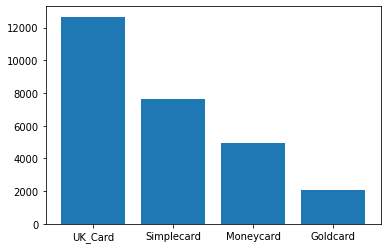

In [39]:
import matplotlib.pyplot as plt
names=['UK_Card','Simplecard','Moneycard','Goldcard']
values=[(raw_dataset.PSP=='UK_Card').sum(),(raw_dataset.PSP=='Simplecard').sum(),(raw_dataset.PSP=='Moneycard').sum()
        ,(raw_dataset.PSP=='Goldcard').sum()]
plt.bar(names,values)

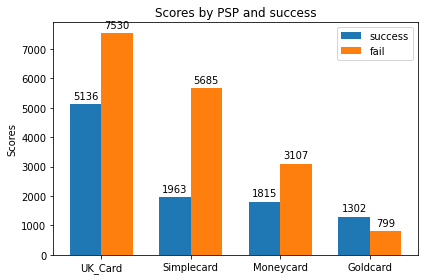

In [40]:
[su,ss,sm,sg]=[0,0,0,0]
[fu,fs,fm,fg]=[0,0,0,0]
for i in range(len(raw_dataset)):
    if raw_dataset.iloc[i,5]=='UK_Card':
        if raw_dataset.iloc[i,4]==1:
            su +=1
        else:
            fu +=1
    elif raw_dataset.iloc[i,5]=='Simplecard':
        if raw_dataset.iloc[i,4]==1:
            ss +=1
        else:
            fs +=1
    elif raw_dataset.iloc[i,5]=='Moneycard':
        if raw_dataset.iloc[i,4]==1:
            sm +=1
        else:
            fm +=1
    elif raw_dataset.iloc[i,5]=='Goldcard':
        if raw_dataset.iloc[i,4]==1:
            sg +=1
        else:
            fg +=1
        
labels = ['UK_Card', 'Simplecard', 'Moneycard', 'Goldcard']
successful = [su,ss,sm,sg]
failed = [fu,fs,fm,fg]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, successful, width, label='success')
rects2 = ax.bar(x + width/2, failed, width, label='fail')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by PSP and success')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [58]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [59]:
dataframe= pd.read_csv('preprocessed')
dataframe.shape

(27337, 47)

In [60]:
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 21870 samples for training and 5467 for validation


In [61]:
dataframe=train_dataframe.copy()
labels = dataframe[dataframe.columns[-5:]]
labels.head()



,UK_Card_success,Simplecard_success,Moneycard_success,Goldcard_success,Failed
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0


In [94]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe[dataframe.columns[-5:]]
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe[dataframe.columns[:-5]]), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [95]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'Unnamed: 0': <tf.Tensor: shape=(), dtype=int64, numpy=22776>, 'Is_Germany': <tf.Tensor: shape=(), dtype=float64, numpy=1.0>, 'Is_Austria': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Is_Switzerland': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Is_Visa': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Is_Diners': <tf.Tensor: shape=(), dtype=float64, numpy=1.0>, 'Is_Master': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'amount0': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'amount1': <tf.Tensor: shape=(), dtype=float64, numpy=1.0>, 'amount2': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Monday': <tf.Tensor: shape=(), dtype=float64, numpy=1.0>, 'Tuesday': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Wednesday': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Thursday': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Friday': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Saturday': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Sunday': 

In [96]:
train_ds = train_ds.batch(16)
val_ds = val_ds.batch(16)

In [99]:
# Numerical features
Is_Germany=keras.Input(shape=(1,),name="Is_Germany")
Is_Austria=keras.Input(shape=(1,),name="Is_Austria")
Is_Switzerland=keras.Input(shape=(1,),name="Is_Switzerland")
'''Is_UK_Card=keras.Input(shape=(1,),name="Is_UK_Card")
Is_Simplecard=keras.Input(shape=(1,),name="Is_Simplecard")
Is_Moneycard=keras.Input(shape=(1,),name="Is_Moneycard")
Is_Goldcard=keras.Input(shape=(1,),name="Is_Goldcard")'''
Is_Visa=keras.Input(shape=(1,),name="Is_Visa")
Is_Diners=keras.Input(shape=(1,),name="Is_Diners")
Is_Master=keras.Input(shape=(1,),name="Is_Master")
amount0=keras.Input(shape=(1,),name="amount0")
amount1=keras.Input(shape=(1,),name="amount1")
amount2=keras.Input(shape=(1,),name="amount2")
Monday=keras.Input(shape=(1,),name="Monday")
Tuesday=keras.Input(shape=(1,),name="Tuesday")
Wednesday=keras.Input(shape=(1,),name="Wednesday")
Thursday=keras.Input(shape=(1,),name="Thursday")
Friday=keras.Input(shape=(1,),name="Friday")
Saturday=keras.Input(shape=(1,),name="Saturday")
Sunday=keras.Input(shape=(1,),name="Sunday")
hour0=keras.Input(shape=(1,),name="hour0")
hour1=keras.Input(shape=(1,),name="hour1")
hour2=keras.Input(shape=(1,),name="hour2")
hour3=keras.Input(shape=(1,),name="hour3")
hour4=keras.Input(shape=(1,),name="hour4")
hour5=keras.Input(shape=(1,),name="hour5")
hour6=keras.Input(shape=(1,),name="hour6")
hour7=keras.Input(shape=(1,),name="hour7")
hour8=keras.Input(shape=(1,),name="hour8")
hour9=keras.Input(shape=(1,),name="hour9")
hour10=keras.Input(shape=(1,),name="hour10")
hour11=keras.Input(shape=(1,),name="hour11")
hour12=keras.Input(shape=(1,),name="hour12")
hour13=keras.Input(shape=(1,),name="hour13")
hour14=keras.Input(shape=(1,),name="hour14")
hour15=keras.Input(shape=(1,),name="hour15")
hour16=keras.Input(shape=(1,),name="hour16")
hour17=keras.Input(shape=(1,),name="hour17")
hour18=keras.Input(shape=(1,),name="hour18")
hour19=keras.Input(shape=(1,),name="hour19")
hour20=keras.Input(shape=(1,),name="hour20")
hour21=keras.Input(shape=(1,),name="hour21")
hour22=keras.Input(shape=(1,),name="hour22")
hour23=keras.Input(shape=(1,),name="hour23")
secured=keras.Input(shape=(1,),name="secured")


all_inputs = [
    Is_Germany,
    Is_Austria,
    Is_Switzerland,
    Is_Visa,
    Is_Diners,
    Is_Master,
    amount0,
    amount1,
    amount2,
    Monday,
    Tuesday,
    Wednesday,
    Thursday,
    Friday,
    Saturday,
    Sunday,
    hour0,
    hour1,
    hour2,
    hour3,
    hour4,
    hour5,
    hour6,
    hour7,
    hour8,
    hour9,
    hour10,
    hour11,
    hour12,
    hour13,
    hour14,
    hour15,
    hour16,
    hour17,
    hour18,
    hour19,
    hour20,
    hour21,
    hour22,
    hour23,
    secured,
]


all_features = layers.concatenate(
    [
    Is_Germany,
    Is_Austria,
    Is_Switzerland,
    Is_Visa,
    Is_Diners,
    Is_Master,
    amount0,
    amount1,
    amount2,
    Monday,
    Tuesday,
    Wednesday,
    Thursday,
    Friday,
    Saturday,
    Sunday,
    hour0,
    hour1,
    hour2,
    hour3,
    hour4,
    hour5,
    hour6,
    hour7,
    hour8,
    hour9,
    hour10,
    hour11,
    hour12,
    hour13,
    hour14,
    hour15,
    hour16,
    hour17,
    hour18,
    hour19,
    hour20,
    hour21,
    hour22,
    hour23,
    secured,

    ]
)
x = layers.Dense(1024, activation="relu")(all_features)
x = layers.Dropout(0.2)(x)
x=layers.Dense(1024,activation="relu")(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(512,activation="relu")(x)
x=layers.Dropout(0.1)(x)
output = layers.Dense(5, activation="softmax")(x)
model = keras.Model(all_inputs, output)
optimizer=keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer, "categorical_crossentropy", metrics=["accuracy"])

In [27]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [100]:
model.fit(train_ds, epochs=1000, validation_data=val_ds)

Epoch 1/1000
1367/1367 [==============================] - 38s 26ms/step - loss: 4.4056 - accuracy: 0.6213 - val_loss: 1.1188 - val_accuracy: 0.6320
Epoch 2/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.7388 - accuracy: 0.6239 - val_loss: 1.1246 - val_accuracy: 0.6320
Epoch 3/1000
1367/1367 [==============================] - 41s 29ms/step - loss: 1.2584 - accuracy: 0.6249 - val_loss: 1.1220 - val_accuracy: 0.6320
Epoch 4/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.3778 - accuracy: 0.6247 - val_loss: 1.1146 - val_accuracy: 0.6320
Epoch 5/1000
1367/1367 [==============================] - 47s 34ms/step - loss: 1.1334 - accuracy: 0.6249 - val_loss: 1.1201 - val_accuracy: 0.6320
Epoch 6/1000
1367/1367 [==============================] - 49s 35ms/step - loss: 1.1329 - accuracy: 0.6249 - val_loss: 1.1179 - val_accuracy: 0.6320
Epoch 7/1000
1367/1367 [==============================] - 50s 36ms/step - loss: 1.1339 - accuracy: 0.6249 - val_

1367/1367 [==============================] - 39s 28ms/step - loss: 1.1333 - accuracy: 0.6249 - val_loss: 1.1135 - val_accuracy: 0.6320
Epoch 57/1000
1367/1367 [==============================] - 37s 27ms/step - loss: 1.1340 - accuracy: 0.6249 - val_loss: 1.1193 - val_accuracy: 0.6320
Epoch 58/1000
1367/1367 [==============================] - 38s 27ms/step - loss: 1.1328 - accuracy: 0.6249 - val_loss: 1.1135 - val_accuracy: 0.6320
Epoch 59/1000
1367/1367 [==============================] - 37s 27ms/step - loss: 1.1342 - accuracy: 0.6249 - val_loss: 1.1169 - val_accuracy: 0.6320
Epoch 60/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1334 - accuracy: 0.6249 - val_loss: 1.1115 - val_accuracy: 0.6320
Epoch 61/1000
1367/1367 [==============================] - 38s 27ms/step - loss: 1.1334 - accuracy: 0.6249 - val_loss: 1.1147 - val_accuracy: 0.6320
Epoch 62/1000
1367/1367 [==============================] - 38s 27ms/step - loss: 1.1335 - accuracy: 0.6249 - val_loss: 1

1367/1367 [==============================] - 48s 35ms/step - loss: 1.1334 - accuracy: 0.6249 - val_loss: 1.1130 - val_accuracy: 0.6320
Epoch 112/1000
1367/1367 [==============================] - 47s 34ms/step - loss: 1.1337 - accuracy: 0.6249 - val_loss: 1.1156 - val_accuracy: 0.6320
Epoch 113/1000
1367/1367 [==============================] - 47s 34ms/step - loss: 1.1336 - accuracy: 0.6249 - val_loss: 1.1173 - val_accuracy: 0.6320
Epoch 114/1000
1367/1367 [==============================] - 47s 34ms/step - loss: 1.1327 - accuracy: 0.6249 - val_loss: 1.1361 - val_accuracy: 0.6320
Epoch 115/1000
1367/1367 [==============================] - 47s 34ms/step - loss: 1.1328 - accuracy: 0.6249 - val_loss: 1.1254 - val_accuracy: 0.6320
Epoch 116/1000
1367/1367 [==============================] - 49s 35ms/step - loss: 1.1345 - accuracy: 0.6249 - val_loss: 1.1161 - val_accuracy: 0.6320
Epoch 117/1000
1367/1367 [==============================] - 46s 33ms/step - loss: 1.1332 - accuracy: 0.6249 - val_l

Epoch 166/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1340 - accuracy: 0.6249 - val_loss: 1.1371 - val_accuracy: 0.6320
Epoch 167/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1333 - accuracy: 0.6249 - val_loss: 1.1319 - val_accuracy: 0.6320
Epoch 168/1000
1367/1367 [==============================] - 38s 28ms/step - loss: 1.1347 - accuracy: 0.6249 - val_loss: 1.1239 - val_accuracy: 0.6320
Epoch 169/1000
1367/1367 [==============================] - 41s 29ms/step - loss: 1.1332 - accuracy: 0.6249 - val_loss: 1.1345 - val_accuracy: 0.6320
Epoch 170/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1319 - accuracy: 0.6249 - val_loss: 1.1222 - val_accuracy: 0.6320
Epoch 171/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1350 - accuracy: 0.6249 - val_loss: 1.1153 - val_accuracy: 0.6320
Epoch 172/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1342 - accuracy:

1367/1367 [==============================] - 40s 29ms/step - loss: 1.1340 - accuracy: 0.6249 - val_loss: 1.1150 - val_accuracy: 0.6320
Epoch 221/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.1339 - accuracy: 0.6249 - val_loss: 1.1197 - val_accuracy: 0.6320
Epoch 222/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1332 - accuracy: 0.6249 - val_loss: 1.1228 - val_accuracy: 0.6320
Epoch 223/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1332 - accuracy: 0.6249 - val_loss: 1.1168 - val_accuracy: 0.6320
Epoch 224/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.1338 - accuracy: 0.6249 - val_loss: 1.1182 - val_accuracy: 0.6320
Epoch 225/1000
1367/1367 [==============================] - 38s 28ms/step - loss: 1.1344 - accuracy: 0.6249 - val_loss: 1.1152 - val_accuracy: 0.6320
Epoch 226/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1321 - accuracy: 0.6249 - val_l

Epoch 275/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1330 - accuracy: 0.6249 - val_loss: 1.1294 - val_accuracy: 0.6320
Epoch 276/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1329 - accuracy: 0.6249 - val_loss: 1.1164 - val_accuracy: 0.6320
Epoch 277/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.1336 - accuracy: 0.6249 - val_loss: 1.1211 - val_accuracy: 0.6320
Epoch 278/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1342 - accuracy: 0.6249 - val_loss: 1.1371 - val_accuracy: 0.6320
Epoch 279/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1333 - accuracy: 0.6249 - val_loss: 1.1172 - val_accuracy: 0.6320
Epoch 280/1000
1367/1367 [==============================] - 42s 30ms/step - loss: 1.1340 - accuracy: 0.6249 - val_loss: 1.1119 - val_accuracy: 0.6320
Epoch 281/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1322 - accuracy:

1367/1367 [==============================] - 40s 29ms/step - loss: 1.1332 - accuracy: 0.6249 - val_loss: 1.1126 - val_accuracy: 0.6320
Epoch 330/1000
1367/1367 [==============================] - 42s 30ms/step - loss: 1.1337 - accuracy: 0.6249 - val_loss: 1.1151 - val_accuracy: 0.6320
Epoch 331/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1334 - accuracy: 0.6249 - val_loss: 1.1289 - val_accuracy: 0.6320
Epoch 332/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1335 - accuracy: 0.6249 - val_loss: 1.1234 - val_accuracy: 0.6320
Epoch 333/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.1339 - accuracy: 0.6249 - val_loss: 1.1202 - val_accuracy: 0.6320
Epoch 334/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1332 - accuracy: 0.6249 - val_loss: 1.1250 - val_accuracy: 0.6320
Epoch 335/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1325 - accuracy: 0.6249 - val_l

Epoch 384/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1333 - accuracy: 0.6249 - val_loss: 1.1141 - val_accuracy: 0.6320
Epoch 385/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1338 - accuracy: 0.6249 - val_loss: 1.1189 - val_accuracy: 0.6320
Epoch 386/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.1335 - accuracy: 0.6249 - val_loss: 1.1132 - val_accuracy: 0.6320
Epoch 387/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1348 - accuracy: 0.6249 - val_loss: 1.1170 - val_accuracy: 0.6320
Epoch 388/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1344 - accuracy: 0.6249 - val_loss: 1.1134 - val_accuracy: 0.6320
Epoch 389/1000
1367/1367 [==============================] - 42s 30ms/step - loss: 1.1324 - accuracy: 0.6249 - val_loss: 1.1399 - val_accuracy: 0.6320
Epoch 390/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1342 - accuracy:

1367/1367 [==============================] - 40s 29ms/step - loss: 1.1346 - accuracy: 0.6249 - val_loss: 1.1236 - val_accuracy: 0.6320
Epoch 439/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.1328 - accuracy: 0.6249 - val_loss: 1.1222 - val_accuracy: 0.6320
Epoch 440/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1328 - accuracy: 0.6249 - val_loss: 1.1201 - val_accuracy: 0.6320
Epoch 441/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1319 - accuracy: 0.6249 - val_loss: 1.1189 - val_accuracy: 0.6320
Epoch 442/1000
1367/1367 [==============================] - 42s 30ms/step - loss: 1.1323 - accuracy: 0.6249 - val_loss: 1.1148 - val_accuracy: 0.6320
Epoch 443/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1336 - accuracy: 0.6249 - val_loss: 1.1154 - val_accuracy: 0.6320
Epoch 444/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.1338 - accuracy: 0.6249 - val_l

Epoch 493/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1339 - accuracy: 0.6249 - val_loss: 1.1140 - val_accuracy: 0.6320
Epoch 494/1000
1367/1367 [==============================] - 42s 30ms/step - loss: 1.1337 - accuracy: 0.6249 - val_loss: 1.1174 - val_accuracy: 0.6320
Epoch 495/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1326 - accuracy: 0.6249 - val_loss: 1.1155 - val_accuracy: 0.6320
Epoch 496/1000
1367/1367 [==============================] - 38s 28ms/step - loss: 1.1335 - accuracy: 0.6249 - val_loss: 1.1281 - val_accuracy: 0.6320
Epoch 497/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.1329 - accuracy: 0.6249 - val_loss: 1.1194 - val_accuracy: 0.6320
Epoch 498/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1331 - accuracy: 0.6249 - val_loss: 1.1328 - val_accuracy: 0.6320
Epoch 499/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1339 - accuracy:

1367/1367 [==============================] - 41s 30ms/step - loss: 1.1331 - accuracy: 0.6249 - val_loss: 1.1200 - val_accuracy: 0.6320
Epoch 548/1000
1367/1367 [==============================] - 38s 28ms/step - loss: 1.1334 - accuracy: 0.6249 - val_loss: 1.1150 - val_accuracy: 0.6320
Epoch 549/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1332 - accuracy: 0.6249 - val_loss: 1.1279 - val_accuracy: 0.6320
Epoch 550/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.1325 - accuracy: 0.6249 - val_loss: 1.1214 - val_accuracy: 0.6320
Epoch 551/1000
1367/1367 [==============================] - 38s 28ms/step - loss: 1.1340 - accuracy: 0.6249 - val_loss: 1.1182 - val_accuracy: 0.6320
Epoch 552/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1334 - accuracy: 0.6249 - val_loss: 1.1147 - val_accuracy: 0.6320
Epoch 553/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.1332 - accuracy: 0.6249 - val_l

Epoch 602/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1340 - accuracy: 0.6249 - val_loss: 1.1197 - val_accuracy: 0.6320
Epoch 603/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1336 - accuracy: 0.6249 - val_loss: 1.1186 - val_accuracy: 0.6320
Epoch 604/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1335 - accuracy: 0.6249 - val_loss: 1.1281 - val_accuracy: 0.6320
Epoch 605/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1332 - accuracy: 0.6249 - val_loss: 1.1338 - val_accuracy: 0.6320
Epoch 606/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1339 - accuracy: 0.6249 - val_loss: 1.1282 - val_accuracy: 0.6320
Epoch 607/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1325 - accuracy: 0.6249 - val_loss: 1.1161 - val_accuracy: 0.6320
Epoch 608/1000
1367/1367 [==============================] - 40s 29ms/step - loss: 1.1331 - accuracy:

1367/1367 [==============================] - 38s 28ms/step - loss: 1.1344 - accuracy: 0.6249 - val_loss: 1.1237 - val_accuracy: 0.6320
Epoch 657/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.1340 - accuracy: 0.6249 - val_loss: 1.1205 - val_accuracy: 0.6320
Epoch 658/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1329 - accuracy: 0.6249 - val_loss: 1.1206 - val_accuracy: 0.6320
Epoch 659/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1334 - accuracy: 0.6249 - val_loss: 1.1172 - val_accuracy: 0.6320
Epoch 660/1000
1367/1367 [==============================] - 41s 30ms/step - loss: 1.1339 - accuracy: 0.6249 - val_loss: 1.1174 - val_accuracy: 0.6320
Epoch 661/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1338 - accuracy: 0.6249 - val_loss: 1.1173 - val_accuracy: 0.6320
Epoch 662/1000
1367/1367 [==============================] - 39s 28ms/step - loss: 1.1341 - accuracy: 0.6249 - val_l

KeyboardInterrupt: 

In [122]:
def record_to_input_data(passed_record):
    record=passed_record
    input_data=[]
    if  record[1]=='Germany':
        temp_list=[1,0,0]
        input_data.extend(temp_list)
    elif record[1]=='Austria':
        temp_list=[0,1,0]
        input_data.extend(temp_list)
    elif record[1]=='Switzerland':
        temp_list=[0,0,1]
        input_data.extend(temp_list)
        
    if record[5]=='Visa':
        temp_list=[1,0,0]
        input_data.extend(temp_list)
    elif record[5]=='Diners':
        temp_list=[0,1,0]
        input_data.extend(temp_list)
    elif record[5]=='Master':
        temp_list=[0,0,1]
        input_data.extend(temp_list)
    
    if record[2]<100:
        temp_list=[1,0,0]
        input_data.extend(temp_list)
    elif 100<= record[2] <=300:
        temp_list=[0,1,0]
        input_data.extend(temp_list)
    elif record[2] >300:
        temp_list=[0,0,1]
        input_data.extend(temp_list)
    
    datetime_object = datetime.strptime(record[0], '%Y-%m-%d %H:%M:%S')
    weekday=datetime.weekday(datetime_object)
    if  weekday==0:
        temp_list=[1,0,0,0,0,0,0]
        input_data.extend(temp_list)
    elif weekday==1:
        temp_list=[0,1,0,0,0,0,0]
        input_data.extend(temp_list)
    elif weekday==2:
        temp_list=[0,0,1,0,0,0,0]
        input_data.extend(temp_list)
    elif weekday==3:
        temp_list=[0,0,0,1,0,0,0]
        input_data.extend(temp_list)
    elif weekday==4:
        temp_list=[0,0,0,0,1,0,0]
        input_data.extend(temp_list)
    elif weekday==5:
        temp_list=[0,0,0,0,0,1,0]
        input_data.extend(temp_list)
    elif weekday==6:
        temp_list=[0,0,0,0,0,0,1]
        input_data.extend(temp_list)
        
    hour=datetime_object.hour
    for j in range (24):
        if j==hour:
            input_data.append(1)
        else:
            input_data.append(0)
            
    input_data.append(record[4])
    return input_data


In [123]:
record=['2019-01-02 01:02:11',"Germany",98,"UK_Card",0,"Visa"]
test_record=record_to_input_data(record)
test_record
#record
#print(type(record[0]))


[1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]